## DRILL: What's the seasons?
Look at the data we created in the beginning. Analyze it to figure out how big a cycle is. Use your programming skills to derive the cycle time rather than looking at the code used to create the series.

### As you can see below, the cycle time is 2 weeks; I did this by booleans, shifting the entire column both up and down, then making a comparison.  This found the local maxima; I simply did the same thing with the time column, to find a 14-day periodicity.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
import scipy

%matplotlib inline

In [2]:
# To simulate a student's rate of learning
lrn = pd.DataFrame()

# Add a range of 100 dates starting Jan 1, 2017.
lrn['date'] = pd.date_range(start='2017-01-01', periods=100)

# Add linearly increasing knowledge and oscillating confidence.
lrn['knowledge'] = np.arange(0, 100)
lrn['confidence'] = 10 * np.cos(np.arange(0, 100) * np.pi / 7) + np.arange(0, 100)

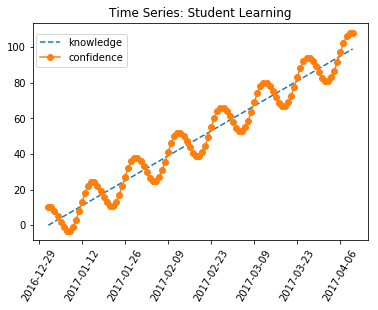

In [3]:
plt.plot(lrn.date, lrn.knowledge, '--')
plt.plot(lrn.date, lrn.confidence, 'o-')

# Rotate the display of x-markers, dates in this case
plt.xticks(rotation=60)
plt.legend(loc = (.01,.8))
plt.title('Time Series: Student Learning')

plt.show()

In [12]:
# See where local maxima occur, gives me what to aim for
lrn.head(20)

,date,knowledge,confidence
0,2017-01-01,0,10.000000
1,2017-01-02,1,10.009689
2,2017-01-03,2,8.234898
3,2017-01-04,3,5.225209
4,2017-01-05,4,1.774791
5,2017-01-06,5,-1.234898
6,2017-01-07,6,-3.009689
7,2017-01-08,7,-3.000000
8,2017-01-09,8,-1.009689
9,2017-01-10,9,2.765102


## My real code starts here

In [11]:
# This will take the difference of each element in the column, compared to the one before
# I can then take the max and see where it occurs throughout the column
# This was a dead-end, but still good to learn about
lrn['confidence'].diff().max()

5.450418679126329

In [25]:
# Compares a given cell to cells before and after, finds all local maxima
prev_is_less = lrn['confidence'] > lrn['confidence'].shift()
next_is_less = lrn['confidence'] > lrn['confidence'].shift(-1)

# OK, now just make sure both are true
lrn[(prev_is_less) & (next_is_less)]

,date,knowledge,confidence
1,2017-01-02,1,10.009689
15,2017-01-16,15,24.009689
29,2017-01-30,29,38.009689
43,2017-02-13,43,52.009689
57,2017-02-27,57,66.009689
71,2017-03-13,71,80.009689
85,2017-03-27,85,94.009689


In [29]:
# It's easy to see above, but here's the difference in times for each local maximum
# That gives us 2 weeks
lrn[(prev_is_less) & (next_is_less)]['date'].diff()

1        NaT
15   14 days
29   14 days
43   14 days
57   14 days
71   14 days
85   14 days
Name: date, dtype: timedelta64[ns]